# Mount Google Drive

Only do this if you're using Colab

In [1]:
#from google.colab import drive

#drive.mount('/content/drive')

# Install Necessary Library

In [2]:
! pip install ultralytics

! pip install tensorflow

! pip install keras

! pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.4/898.4 kB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.4 MB/s eta 0:00:00


# Importing Library

In [3]:
from ultralytics import YOLO

import matplotlib.pyplot as plt

import tensorflow as tf

import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Downloading and Extracting the Dataset in Zip File

## Importing the Dataset from Roboflow

Importing the dataset straight from Roboflow will automatically extract the zip file

In [4]:
# from google.colab import userdata

#RF_TOKEN = userdata.get('RF_TOKEN')

In [7]:
!pip install roboflow

from roboflow import Roboflow

In [5]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
RF_TOKEN = user_secrets.get_secret("RF_TOKEN")

In [6]:
rf = Roboflow(api_key=RF_TOKEN)
project = rf.workspace("florys-ijzit").project("flower-disease-aoxpb")
version = project.version(6)
dataset = version.download("yolov8")

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flower-Disease-6 in yolov8:: 100%|██████████| 7850/7850 [00:00<00:00, 7927.23it/s]


# Training the Model

In [8]:
from ultralytics import YOLO

In [9]:
# Load YOLOv8 model
model = YOLO('yolov8s.pt')

# Train on custom dataset
model.train(data='/kaggle/working/Flower-Disease-6/data.yaml', epochs=100, imgsz=640, batch=64, lr0 = 0.01)

100%|██████████| 21.5M/21.5M [00:00<00:00, 124MB/s] 


Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Flower-Disease-6/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 16.9MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Flower-Disease-6/train/labels... 3646 images, 6 backgrounds, 0 corrupt: 100%|██████████| 3646/3646 [00:03<00:00, 1075.24it/s]


train: New cache created: /kaggle/working/Flower-Disease-6/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 348, len(boxes) = 17109. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/Flower-Disease-6/valid/labels... 272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<00:00, 1031.94it/s]

val: New cache created: /kaggle/working/Flower-Disease-6/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      15.2G      1.406      2.644      1.625        623        640: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]

                   all        272       1135      0.362      0.561      0.407      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      15.1G      1.232       1.43      1.421        465        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]


                   all        272       1135      0.315      0.237      0.232      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      15.2G      1.219      1.327      1.413        555        640: 100%|██████████| 57/57 [01:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all        272       1135      0.414      0.374      0.364      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      15.3G      1.211      1.253      1.411        564        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        272       1135      0.371      0.413      0.382      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      14.7G      1.174       1.18      1.382        515        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.524      0.536       0.51      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.4G      1.144      1.114      1.366        513        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.421      0.466      0.421      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        15G      1.118      1.062      1.348        537        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        272       1135      0.483      0.564      0.509      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.4G      1.106      1.023      1.343        529        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.645      0.489      0.584      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.5G      1.088     0.9773      1.329        512        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.491      0.524      0.518       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      15.3G      1.068     0.9502      1.319        457        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135      0.597      0.507      0.573      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      15.3G      1.048     0.9204      1.308        533        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135      0.666      0.686      0.704      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        15G      1.032     0.8913      1.293        503        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        272       1135      0.711      0.607      0.671      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      15.4G      1.022     0.8682      1.288        442        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.643      0.669      0.674      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      15.3G      1.012     0.8328      1.272        468        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.586      0.608      0.565      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      15.3G      1.016     0.8273      1.275        492        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.516      0.555      0.513      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      14.2G      1.004      0.794      1.268        562        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135       0.71      0.636      0.696      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.3G     0.9809      0.787      1.254        585        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135      0.577      0.595      0.609      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      15.3G     0.9734     0.7583      1.254        530        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135       0.64      0.585       0.63      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      15.2G     0.9675     0.7625      1.243        553        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.694      0.634      0.655      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.6G      0.945     0.7261      1.225        531        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.567      0.623       0.58      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      15.6G     0.9355     0.7167      1.231        497        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.693      0.662      0.687      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      15.5G     0.9344     0.7165       1.22        521        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.711      0.641      0.684      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.8G     0.9192     0.6887      1.207        538        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.696      0.649      0.676      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.8G      0.907     0.6775      1.202        525        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.573      0.661      0.577      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      15.1G     0.9001     0.6651      1.197        603        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.616      0.574      0.577      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      15.6G     0.9016      0.666      1.197        542        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.657      0.707      0.691      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      15.2G     0.8854     0.6504      1.193        563        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.666      0.671      0.694      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      15.1G     0.8735     0.6351      1.182        523        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135      0.647      0.667      0.683      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.1G     0.8745     0.6327      1.182        498        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.786      0.571      0.657      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      15.5G     0.8632     0.6158      1.173        559        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.729      0.701       0.73      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      15.2G     0.8604     0.6155      1.175        504        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.633      0.605      0.616      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      15.5G     0.8487     0.5906      1.158        469        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.678      0.658      0.702      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100        14G     0.8442     0.5984      1.163        606        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.686      0.647       0.67      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.8G     0.8376     0.5937      1.157        523        640: 100%|██████████| 57/57 [01:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135      0.677      0.713      0.697      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.9G      0.818     0.5698      1.152        526        640: 100%|██████████| 57/57 [01:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.729      0.649      0.691       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      15.1G     0.8165     0.5719      1.153        569        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all        272       1135      0.644      0.653      0.667      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      15.2G     0.8147     0.5679      1.148        546        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.652      0.602      0.652      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        14G     0.8044     0.5605       1.14        504        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.702      0.663      0.694      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      15.2G     0.7985     0.5532      1.131        559        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.745      0.651      0.709      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.7G     0.7887     0.5489      1.129        549        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.648      0.636      0.651      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      15.5G     0.7943     0.5378      1.128        540        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.652       0.66      0.643      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      15.3G      0.775     0.5335      1.115        626        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.698      0.637      0.667      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      15.3G     0.7872     0.5367      1.123        529        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.624      0.716      0.704      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.7G     0.7658     0.5257      1.115        632        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.766      0.641      0.694      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        14G     0.7671     0.5271      1.114        508        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.731      0.638       0.71      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.3G     0.7464     0.5095      1.105        423        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135       0.66      0.658      0.687      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.9G      0.752     0.5065      1.108        474        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135      0.743      0.624      0.696       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.5G     0.7439     0.5012      1.106        506        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135       0.69      0.653      0.686      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      15.4G     0.7405     0.5011      1.102        546        640: 100%|██████████| 57/57 [01:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.714      0.671      0.709      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      15.3G     0.7367     0.5003      1.094        595        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135       0.72      0.594      0.674      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.9G     0.7252     0.4898      1.089        605        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.733      0.624      0.673       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.5G     0.7217     0.4853      1.091        555        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.686       0.68      0.697      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      15.4G     0.7181     0.4877      1.087        512        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        272       1135      0.732      0.701      0.725      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      15.6G     0.7152     0.4754      1.081        564        640:  93%|█████████▎| 53/57 [01:01<00:04,  1.17s/it]

     54/100      15.6G     0.7161     0.4763       1.08        526        640: 100%|██████████| 57/57 [01:14<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]

                   all        272       1135      0.737      0.654      0.728      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.7G     0.7099     0.4707      1.083        456        640: 100%|██████████| 57/57 [01:07<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.758      0.661      0.724      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.9G      0.691      0.465      1.078        541        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.739      0.614      0.707      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      15.4G     0.7009     0.4643      1.079        559        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        272       1135      0.637      0.678      0.687      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      14.4G     0.6934     0.4644      1.073        515        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.819      0.648      0.742      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.9G     0.6897      0.463      1.075        530        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.743       0.66      0.725      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      15.4G     0.6837     0.4512       1.07        432        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.755      0.672      0.727      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      15.6G     0.6753     0.4477      1.067        625        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.683      0.673      0.703      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      14.6G      0.677     0.4449      1.067        625        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        272       1135      0.669      0.717      0.723      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        14G     0.6694     0.4478      1.065        519        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.713       0.71      0.731      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      14.9G     0.6641     0.4325      1.053        565        640:  39%|███▊      | 22/57 [00:25<00:40,  1.17s/it]

     64/100      14.9G     0.6656     0.4387      1.056        510        640: 100%|██████████| 57/57 [01:16<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.705      0.641      0.699      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      15.1G     0.6618     0.4396       1.06        611        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.717      0.675      0.722      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      14.5G     0.6524     0.4358      1.053        442        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.672      0.672       0.68      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100        15G     0.6484     0.4311      1.046        698        640:  26%|██▋       | 15/57 [00:17<00:49,  1.18s/it]

     67/100      15.6G     0.6575     0.4344      1.055        534        640: 100%|██████████| 57/57 [01:14<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.765      0.637      0.698        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      15.5G     0.6414     0.4223      1.044        484        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.751      0.661      0.727      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100        15G     0.6398     0.4211      1.049        544        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.629      0.717      0.701      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.8G     0.6275     0.4155      1.043        582        640:  51%|█████     | 29/57 [00:33<00:32,  1.16s/it]

     70/100      15.6G     0.6331     0.4147      1.043        613        640: 100%|██████████| 57/57 [01:15<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        272       1135      0.723      0.693      0.721      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      15.3G     0.6383      0.416      1.044        595        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.752      0.673      0.712      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      15.4G     0.6297      0.413      1.038        558        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135       0.73       0.65      0.712      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      15.6G      0.625     0.4103      1.036        592        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        272       1135      0.735      0.688      0.715      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      14.9G     0.6262     0.4105      1.037        513        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135      0.727      0.686       0.72      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      15.1G     0.6173     0.3964      1.033        487        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.725      0.708      0.725      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      15.5G     0.6207     0.3965      1.033        616        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.743      0.667      0.708      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      15.6G     0.6095     0.3991      1.032        580        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.747      0.667      0.707      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      14.8G     0.6101     0.3954      1.032        490        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.771      0.673      0.733      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      15.6G     0.6014     0.3912      1.026        534        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        272       1135      0.721      0.645      0.702      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      15.6G     0.5976     0.3869      1.022        562        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.715      0.646      0.715      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.5G     0.6011     0.3908      1.025        579        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.703      0.657      0.696      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      15.6G     0.5916     0.3841       1.02        599        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135      0.708      0.656        0.7      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      15.4G     0.5825     0.3765      1.016        486        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.761      0.637       0.72      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      15.5G     0.5862     0.3809      1.019        549        640:  51%|█████     | 29/57 [00:33<00:33,  1.18s/it]

     84/100      15.3G     0.5847     0.3782      1.016        446        640: 100%|██████████| 57/57 [01:16<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all        272       1135      0.694      0.645      0.702      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      15.3G     0.5838     0.3786      1.017        620        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.754      0.669       0.73      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      15.3G     0.5756     0.3707      1.009        548        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.658      0.707       0.71      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      15.5G     0.5706     0.3659      1.006        522        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.714      0.703      0.721       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      15.4G     0.5617     0.3612      1.001        533        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all        272       1135      0.626      0.729      0.703      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      15.3G     0.5678      0.364      1.005        637        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.693      0.713      0.711      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      15.2G     0.5651     0.3643      1.006        504        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.762      0.642      0.721       0.52


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        15G     0.5134     0.2902     0.9611        290        640: 100%|██████████| 57/57 [01:07<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.753      0.661      0.708        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      15.2G     0.4807     0.2595     0.9434        277        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.716      0.692      0.724      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        15G     0.4738     0.2533     0.9429        318        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        272       1135      0.786      0.641      0.726      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      15.2G     0.4755     0.2571     0.9457        353        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        272       1135      0.678      0.736      0.727      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      14.6G     0.4692     0.2489     0.9403        242        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        272       1135      0.731      0.665      0.722      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      15.1G     0.4636     0.2494     0.9387        296        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.759      0.644      0.727      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        15G     0.4581     0.2421     0.9354        275        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.732      0.637       0.71      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      15.2G     0.4534     0.2427     0.9283        270        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.738      0.639      0.716      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      15.2G     0.4519     0.2446     0.9299        279        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        272       1135      0.735      0.638       0.72      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      15.1G     0.4466     0.2401     0.9279        313        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        272       1135      0.785      0.616       0.72      0.522



100 epochs completed in 1.949 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


                   all        272       1135      0.771      0.673      0.733      0.526
            black-spot        200        532      0.779      0.818      0.848        0.6
          downy-mildew         39        106      0.914      0.557      0.679      0.509
               healthy        167        497       0.62      0.646      0.672      0.469
Speed: 0.2ms preprocess, 5.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x790ccd421600>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

# Evaluating the Model

In [15]:
# Evaluate the model
metrics = model.val(data='/kaggle/working/Flower-Disease-6/data.yaml')

# Print the evaluation metrics
print(metrics)

# Access specific metrics
print(f"mAP@0.5: {metrics.box.map50}")
print(f"mAP@0.5:0.95: {metrics.box.map}")

# Visualize the results using the plot method
results = model.val(data='/kaggle/working/Flower-Disease-6/data.yaml',plots=True)

Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/Flower-Disease-6/valid/labels.cache... 272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]


                   all        272       1135      0.771      0.673      0.733      0.526
            black-spot        200        532       0.78      0.818      0.848        0.6
          downy-mildew         39        106      0.914      0.557      0.679       0.51
               healthy        167        497       0.62      0.646      0.672      0.469
Speed: 0.2ms preprocess, 10.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x790ccd228970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0

val: Scanning /kaggle/working/Flower-Disease-6/valid/labels.cache... 272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.52it/s]


                   all        272       1135      0.771      0.673      0.733      0.526
            black-spot        200        532       0.78      0.818      0.848        0.6
          downy-mildew         39        106      0.914      0.557      0.679       0.51
               healthy        167        497       0.62      0.646      0.672      0.469
Speed: 0.3ms preprocess, 11.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val2


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


# Testing the Model

In [46]:
!wget 'https://cdn.images.express.co.uk/img/dynamic/13/590x/1954258_1.jpg' -O 'disease_7.jpg'

--2024-12-06 02:39:13--  https://cdn.images.express.co.uk/img/dynamic/13/590x/1954258_1.jpg
Resolving cdn.images.express.co.uk (cdn.images.express.co.uk)... 52.85.247.128, 52.85.247.27, 52.85.247.53, ...
Connecting to cdn.images.express.co.uk (cdn.images.express.co.uk)|52.85.247.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41129 (40K) [image/jpeg]
Saving to: 'disease_7.jpg'

disease_7.jpg       100%[===================>]  40.17K  --.-KB/s    in 0.08s   

2024-12-06 02:39:14 (532 KB/s) - 'disease_7.jpg' saved [41129/41129]




image 1/1 /kaggle/working/disease_7.jpg: 448x640 1 fungal-disease, 1 healthy, 45.7ms
Speed: 2.7ms preprocess, 45.7ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict19
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 4.], device='cuda:0')
conf: tensor([0.8780, 0.5480], device='cuda:0')
data: tensor([[255.2975, 135.4138, 392.0527, 280.6155,   0.8780,   3.0000],
        [382.7137, 111.1932, 477.2480, 287.9879,   0.5480,   4.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (393, 590)
shape: torch.Size([2, 6])
xywh: tensor([[323.6751, 208.0147, 136.7551, 145.2017],
        [429.9809, 199.5905,  94.5343, 176.7947]], device='cuda:0')
xywhn: tensor([[0.5486, 0.5293, 0.2318, 0.3695],
        [0.7288, 0.5079, 0.1602, 0.4499]], device='cuda:0')
xyxy: tensor([[255.2975, 135.4138, 392.0527, 280.6155],
        [382.7137, 111.1932, 477.2480, 287.9879]], device='cuda:0')
xyxyn: tensor([[0.4327, 0.3446, 0.6645

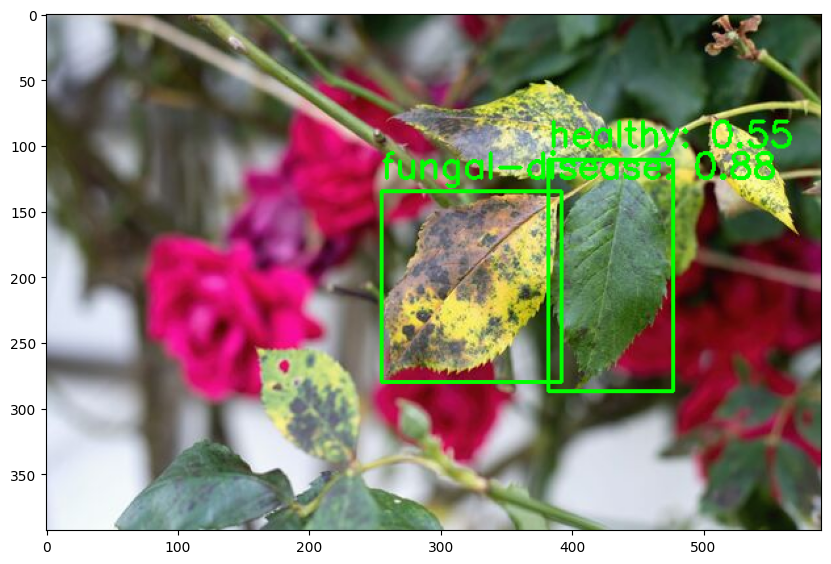

In [47]:
# Load the trained model. Replace with the actual path to your trained weights.
model_path = '/kaggle/working/runs/detect/train/weights/best.pt' # Update with the correct path to your trained weights
model = YOLO(model_path)

# Testing the Model
test_path = '/kaggle/working/disease_7.jpg'
results = model.predict(source=test_path, save=True, conf=0.25)

# Print the bounding boxes, confidence scores, and class names.
for r in results:
    print(r.boxes) # Print bounding box information
    print(r.boxes.conf) # Print confidence scores
    print(r.boxes.cls) # Print predicted classes

# Display the image with bounding boxes
img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB format

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        cls = int(box.cls[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding boxes
        text = f"{model.names[cls]}: {conf:.2f}"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

# Saving the Model for Deployment

In [ ]:
#from google.colab import files

# Using h5 format

In [49]:
model.save('florys.h5')

# Using saved_model format

In [65]:
model.export(format='saved_model')

Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (21.5 MB)

TensorFlow SavedModel: starting export with tensorflow 2.16.1...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.43...
ONNX: export success ✅ 1.9s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (42.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


W0000 00:00:1733455756.268527      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733455756.268567      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
W0000 00:00:1733455759.604207      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733455759.604247      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 18.7s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model' (106.7 MB)

Export complete (19.3s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model imgsz=640 data=/kaggle/working/Flower-Disease-6/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train/weights/best_saved_model'

In [71]:
!zip -r saved_model.zip /kaggle/working/runs/detect/train/weights/best_saved_model

  adding: kaggle/working/runs/detect/train/weights/best_saved_model/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/fingerprint.pb (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/assets/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/best_float16.tflite (deflated 8%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite (deflated 16%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/variables/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/variables/variables.data-00000-of-00001 (deflated 80%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/variables/variables.index (deflated 33%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/metadata.yaml (deflated 32%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/saved_model.pb (deflated 8%)


In [72]:
from IPython.display import FileLink
FileLink(r'saved_model.zip')

/kaggle/working/saved_model.zip

# Using the TF.js format

In [61]:
model.export(format = 'tfjs')

Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (21.5 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 50.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 147.8 MB/s eta 0:00:

100%|██████████| 1.11M/1.11M [00:00<00:00, 17.3MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 51.11file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.43...
ONNX: export success ✅ 1.6s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (42.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


W0000 00:00:1733454150.012989      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733454150.013052      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
W0000 00:00:1733454152.675233      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733454152.675265      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 50.6s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model' (106.7 MB)

TensorFlow GraphDef: starting export with tensorflow 2.16.1...
TensorFlow GraphDef: export success ✅ 5.4s, saved as '/kaggle/working/runs/detect/train/weights/best.pb' (42.7 MB)
requirements: Ultralytics requirement ['tensorflowjs'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.10.1 requires cubinlinker, which is not installed.
cudf 24.10.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.10.1 requires libcudf==24.10.*, which is not installed.
cudf 24.10.1 requires ptxcompiler, which is not installed.
cuml 24.10.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 24.10.0 requires cuvs==24.10.*, which is not installed.
cuml 24.10.0 requires nvidia-cublas, which is not installed.
cuml 24.10.0 requires nvidia-cufft, which is not installed.
cuml 24.10.0 requires nvidia-curand, which is not installed.
cuml 24.10.0 requires nvidia-cusolver, which is not installed.
cuml 24.10.0 requires nvidia-cusparse, which is not installed.
dask-cudf 24.10.1 requires cupy-cuda11x>=12.0.0, which is not installed.
pylibcudf 24.10.1 requires libcudf==24.10.*, which is not install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 229.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3

requirements: AutoUpdate success ✅ 8.2s, installed 1 package: ['tensorflowjs']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


TensorFlow.js: starting export with tensorflowjs 4.22.0...

TensorFlow.js: output node names: Identity:0
TensorFlow.js: running 'tensorflowjs_converter --input_format=tf_frozen_model  --output_node_names=Identity:0 "/kaggle/working/runs/detect/train/weights/best.pb" "/kaggle/working/runs/detect/train/weights/best_web_model"'
weight model_13/tf.strided_slice_19/ones_like/tensor with shape (3,) and dtype int64 was auto converted to the type int32
weight model_13/tf.strided_slice_19/StridedSlice/end with shape (3,) and 

'/kaggle/working/runs/detect/train/weights/best_web_model'

In [74]:
!zip -r tfjs.zip /kaggle/working/runs/detect/train/weights/best_saved_model

  adding: kaggle/working/runs/detect/train/weights/best_saved_model/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/fingerprint.pb (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/assets/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/best_float16.tflite (deflated 8%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite (deflated 16%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/variables/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/variables/variables.data-00000-of-00001 (deflated 80%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/variables/variables.index (deflated 33%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/metadata.yaml (deflated 32%)
  adding: kaggle/working/runs/detect/train/weights/best_saved_model/saved_model.pb (deflated 8%)


In [76]:
FileLink(r'tfjs.zip')

/kaggle/working/tfjs.zip

## Using the TFLite format

In [58]:
model.save('florys.tflite')

In [62]:
model.export(format='tflite')

Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (21.5 MB)

TensorFlow SavedModel: starting export with tensorflow 2.16.1...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.43...
ONNX: export success ✅ 1.5s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (42.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


W0000 00:00:1733454189.014650      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733454189.014681      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
W0000 00:00:1733454190.987825      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733454190.987856      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 16.7s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model' (106.9 MB)

TensorFlow Lite: starting export with tensorflow 2.16.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite' (42.7 MB)

Export complete (17.3s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/working/Flower-Disease-6/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite'

In [80]:
FileLink(r'runs/detect/train/weights/best_saved_model/best_float32.tflite')

/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite

In [ ]:
#files.download('/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite')

## (Optional) Using PyTorch

In [ ]:
model.save('florys.pt')

In [ ]:
#files.download('/content/florys.pt')

## (Optional) Save to onnx File

In [59]:
model.save('florys.onnx')

In [63]:
model.export(format='onnx')

Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (21.5 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.43...
ONNX: export success ✅ 1.8s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (42.7 MB)

Export complete (2.5s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best.onnx imgsz=640 data=/kaggle/working/Flower-Disease-6/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train/weights/best.onnx'

In [81]:
FileLink(r'runs/detect/train/weights/best.onnx')

/kaggle/working/runs/detect/train/weights/best.onnx

In [ ]:
#files.download('/content/runs/detect/train2/weights/best.onnx')